# Linear regression theory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

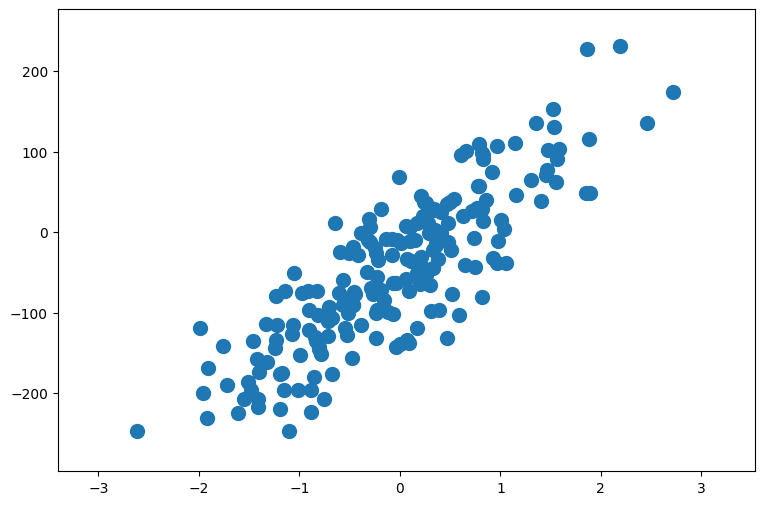

In [2]:
# creating a dataset
x, y, coef = make_regression(n_samples=200, n_features=1, bias=-50, 
                             tail_strength=10, noise=50, random_state=42, coef=True)

# ================================================

# ploting the dataset
plt.figure(figsize=(9, 6))
plt.plot(x, y, marker="o", markersize = 10.0, linestyle='None')

# ================================================

# adjusting the axes limits
ax = plt.gca()
ax.set(xlim=(x.min()*1.3, x.max()*1.3), ylim=(y.min()*1.2, y.max()*1.2))

plt.show()

Observing the data, it is evident that there is a **relationship** between the variable $y$ (which is usually called **target**) and the variable $x$ (which is usually called **feature**). More than that, despite there being some variability, there seems to be a **linear** relationship between the feature and the target, isn't there?

This relationship is expressed by the linear regression method: this method is able to model a **linear relationship** between the feature and the target. That is, since in this case we have only a single feature $x$, we express the relationship between the data by the following **equation of a straight line**:

$ y = w_0 + w_1 x $

The function above is called the **hypothesis function** of the modeling. Note that this function is **parameterized** by the **parameters** $w_0$ and $w_1$ (which are also called **weights**). Both parameters are real numbers, $w_0, w_1 \in \mathbb{R}$. It is very common to allocate these parameters in a single vector, known as the **parameter vector**. In this case, as we have only two parameters, the parameter vector would be denoted by:

$\vec{w} = \begin{bmatrix}
w_0\\ 
w_1
\end{bmatrix}$

These parameters are extremely important, as they are the ones that **determine which specific line** we are considering. Let's understand this better. The parameter $w_0$ is known as "linear coefficient" or **intercept**, because it is precisely in this value that the line **intercepts the y axis**; the parameter $w_1$ is known as "angular coefficient", because it is this coefficient that determines the **slope** of the line. With this in mind, consider the figure below, generated by the following code snippet, which uses the Matplotlib library:

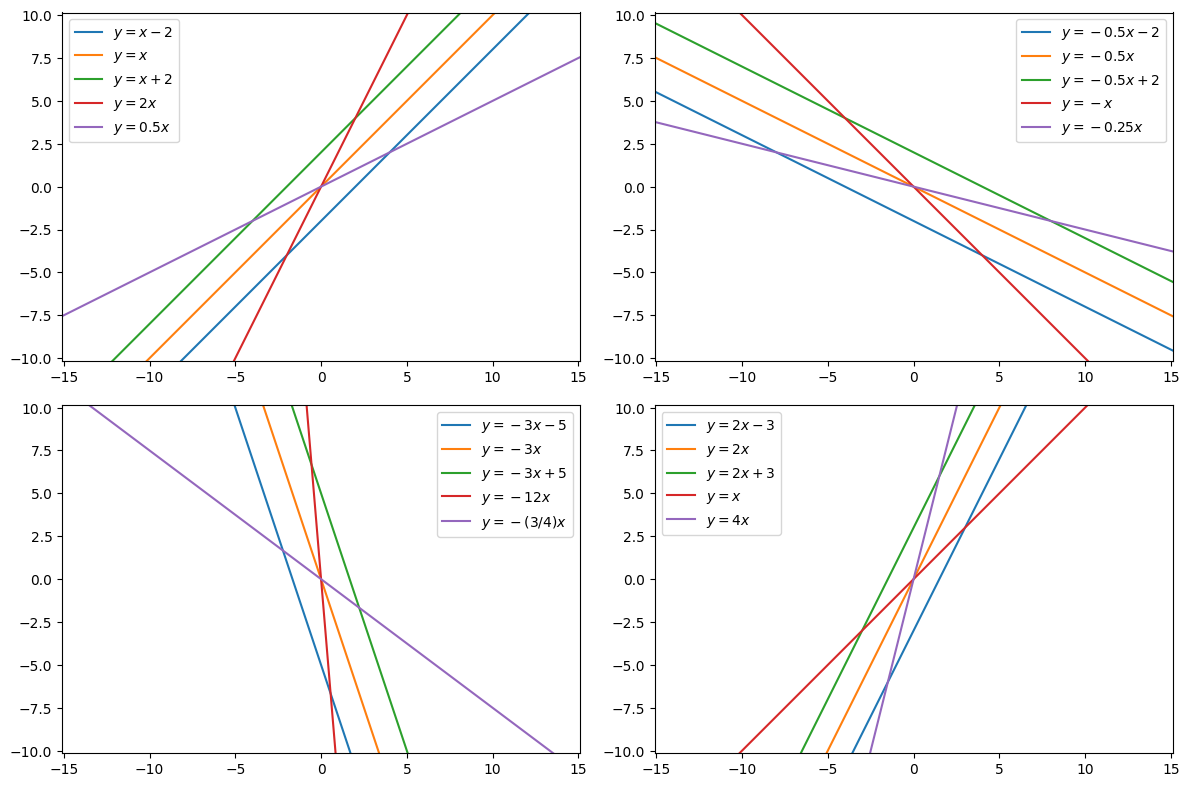

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
ax0, ax1, ax2, ax3 = axs.flatten()

# ================================================

x = np.linspace(-20, 20, 100)

# ================================================

ax0.plot(x, x - 2, label="$y=x-2$")
ax0.plot(x, x, label="$y=x$")
ax0.plot(x, x + 2, label="$y=x+2$")

ax0.plot(x, 2*x, label="$y=2x$")
ax0.plot(x, 0.5*x, label="$y=0.5x$")

_ = ax0.legend(loc="best")
ax0.axis('equal')
ax0.set(xlim=(-10, 10), ylim=(-10, 10))

# ================================================

ax1.plot(x, -0.5*x - 2, label="$y=-0.5x-2$")
ax1.plot(x, -0.5*x, label="$y=-0.5x$")
ax1.plot(x, -0.5*x + 2, label="$y=-0.5x+2$")

ax1.plot(x, -1*x, label="$y=-x$")
ax1.plot(x, -0.25*x, label="$y=-0.25x$")

_ = ax1.legend(loc="best")
ax1.axis('equal')
ax1.set(xlim=(-10, 10), ylim=(-10, 10))

# ================================================

ax2.plot(x, -3*x - 5, label="$y=-3x-5$")
ax2.plot(x, -3*x, label="$y=-3x$")
ax2.plot(x, -3*x + 5, label="$y=-3x+5$")

ax2.plot(x, -12*x, label="$y=-12x$")
ax2.plot(x, -3/4*x, label="$y=-(3/4)x$")

_ = ax2.legend(loc="best")
ax2.axis('equal')
ax2.set(xlim=(-10, 10), ylim=(-10, 10))

# ================================================

ax3.plot(x, 2*x - 3, label="$y=2x-3$")
ax3.plot(x, 2*x, label="$y=2x$")
ax3.plot(x, 2*x + 3, label="$y=2x+3$")

ax3.plot(x, 1*x, label="$y=x$")
ax3.plot(x, 4*x, label="$y=4x$")

_ = ax3.legend(loc="best")
ax3.axis('equal')
ax3.set(xlim=(-10, 10), ylim=(-10, 10))

# ================================================

plt.legend()
plt.tight_layout()
plt.show()

Note how, by changing the values of the parameters $w_0$ and $w_1$, we have completely different lines, although they are all lines, and therefore have an equation of a straight line.

So, note that this equation describes any and all lines you can imagine --- there are literally infinite different lines, since the parameters $w_0$ and $w_1$ each can take infinite possible values.

The objective of the linear regression method is very simple: given that there are infinite possible lines, described by the hypothesis of the straight line equation, we want to determine **which line best fits the data we have available**. After all, since there are infinite options of lines, it is expected that some of them describe the data well, while others are clearly poor descriptions. For example, the code snippet below generates 4 examples of lines:

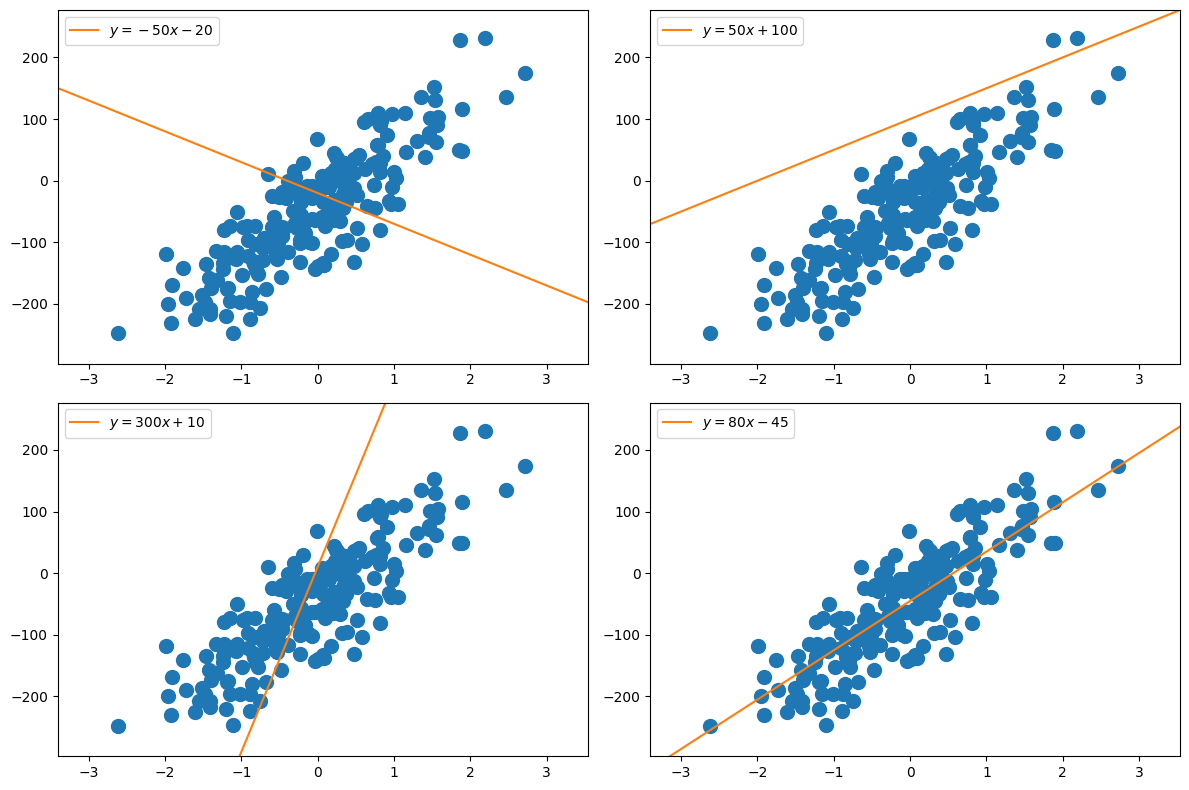

In [4]:
x_data, y_data, coef = make_regression(n_samples=200, n_features=1, bias=-50, 
                                       tail_strength=10, noise=50, random_state=42, coef=True)

# ================================================

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
ax0, ax1, ax2, ax3 = axs.flatten()

# ================================================

x = np.linspace(x_data.min()*2, x_data.max()*2, 100)

# ================================================

ax0.plot(x_data, y_data, marker="o", markersize = 10.0, linestyle='None')
ax0.plot(x, -50*x - 20, label="$y=-50x-20$")
_ = ax0.legend(loc="best")
ax0.set(xlim=(x_data.min()*1.3, x_data.max()*1.3), ylim=(y_data.min()*1.2, y_data.max()*1.2))

# # ================================================

ax1.plot(x_data, y_data, marker="o", markersize = 10.0, linestyle='None')
ax1.plot(x, 50*x + 100, label="$y=50x+100$")
_ = ax1.legend(loc="best")
ax1.set(xlim=(x_data.min()*1.3, x_data.max()*1.3), ylim=(y_data.min()*1.2, y_data.max()*1.2))

# # ================================================

ax2.plot(x_data, y_data, marker="o", markersize = 10.0, linestyle='None')
ax2.plot(x, 300*x + 10, label="$y=300x+10$")
_ = ax2.legend(loc="best")
ax2.set(xlim=(x_data.min()*1.3, x_data.max()*1.3), ylim=(y_data.min()*1.2, y_data.max()*1.2))

# # ================================================

ax3.plot(x_data, y_data, marker="o", markersize = 10.0, linestyle='None')
ax3.plot(x, 80*x - 45, label="$y=80x-45$")
_ = ax3.legend(loc="best")
ax3.set(xlim=(x_data.min()*1.3, x_data.max()*1.3), ylim=(y_data.min()*1.2, y_data.max()*1.2))

# ================================================

plt.legend()
plt.tight_layout()
plt.show()

What the linear regression method does is determine, of all the infinite possible lines, the one that **best fits the data**, which in this case is identified and plotted by the following code snippet:


Parameters of the best line:
w0 = -50; w1 = 87.74



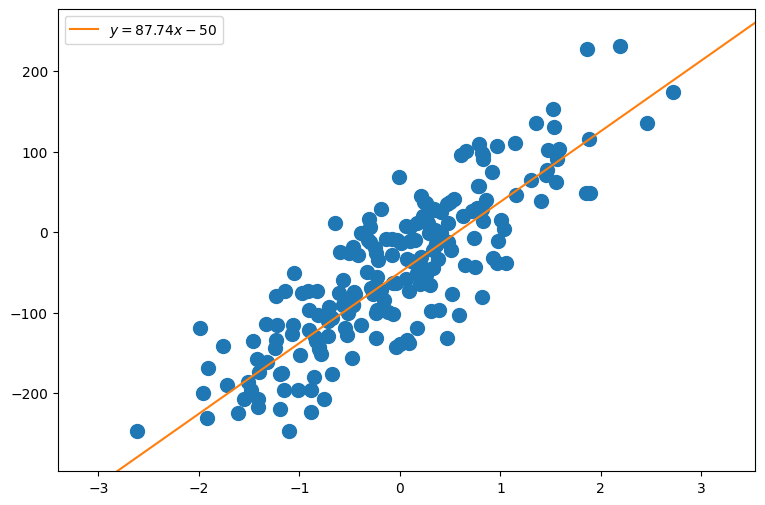

In [5]:
b = -50
x, y, coef = make_regression(n_samples=200, n_features=1, bias=b, 
                             tail_strength=10, noise=50, random_state=42, coef=True)

print("\nParameters of the best line:")
print(f"w0 = {b}; w1 = {coef:.2f}\n")

# ================================================

plt.figure(figsize=(9, 6))
plt.plot(x, y, marker="o", markersize = 10.0, linestyle='None')

# ================================================

x_model = np.linspace(-5, 5, 100)
y_model = b + coef*x_model

plt.plot(x_model, y_model, label=f"$y={coef:.2f}x{b}$")

ax = plt.gca()
ax.set(xlim=(x.min()*1.3, x.max()*1.3), ylim=(y.min()*1.2, y.max()*1.2))

plt.legend()
plt.show()

A very important point is that the determination of specific lines is totally equivalent to the **determination of the parameter vector**. That is, operationally, what the linear regression method provides is a way to **determine the parameter vector that best fits the data**.

Therefore, the straight line hypothesis function can be written as a scalar product. To understand this, consider the introduction of the **feature vector**:

$\vec{x} = \begin{bmatrix}
x_0\\ 
x_1
\end{bmatrix}$

It is very common to introduce the "auxiliary feature" $x_0$ which is always fixed as being equal to $1$. In this way, as in our case $x_1 = x$, we can rewrite the feature vector as:

$\vec{x} = \begin{bmatrix}
1\\ 
x
\end{bmatrix}$

Now take the scalar product between the parameter vector and the feature vector. The result is exactly the hypothesis of the straight line equation:

$\vec{w} \cdot \vec{x}  =
\begin{bmatrix}
w_0\\ 
w_1
\end{bmatrix} \cdot
\begin{bmatrix}
x_0\\ 
x_1
\end{bmatrix}
= w_0x_0 + w_1x_1 = w_0 + w_1x $

Note that fixing $x_0 = 1$ is very important so that the linear coefficient $w_0$ (which does not accompany any feature) is correctly and directly extracted from the scalar product above. Therefore, we can write the hypothesis function of linear regression in an extremely simple way --- it is common to denote it by $f_{H, \vec{w}}(\vec{x})$, indicating that this hypothesis function (subscript $H$) is parameterized (subscript $\vec{w}$):

$f_{H, \vec{w}}(\vec{x}) = \vec{w} \cdot \vec{x}$

And we can go further: the linear regression method is easily generalized to $n$ dimensions, when we have not one, but $n$ features. It is common that, in this case, we refer to the method as "multilinear regression", where the "multi" indicates that there is more than one feature. However, calling the method just "linear regression", regardless of the number of features, is sufficient. The important thing is that, in this case, the hypothesis no longer represents a straight line, but rather a **hyperplane in dimension $n$**. Despite the complicated name, the relationship remains the same: a linear combination between the features and the parameters! The only thing that changes is that these vectors are now in $\mathbb{R}^n$:

$\vec{w} =
\begin{bmatrix}
w_0\\ 
w_1\\
\vdots\\
w_n
\end{bmatrix} \ ; \
\vec{x} =
\begin{bmatrix}
1\\ 
x_1\\
\vdots\\
x_n
\end{bmatrix}
$

Note that we already fixed $x_0 = 1$, our auxiliary feature for extracting the parameter $w_0$. What is interesting is that, even in this case in arbitrary dimension $n$, we have exactly **the same hypothesis** as the function above. The only thing is that, as the vectors are of dimension $n$, the scalar product results in more terms in the linear combination:

$f_{H, \vec{w}}(\vec{x}) = \vec{w} \cdot \vec{x} = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n$

There are still other ways to represent the linear regression hypothesis function, in particular, one that aggregates the information in matrices, which is an extremely convenient way to write and work with the problem (which shows, once again, how much linear algebra is important and omnipresent).